## Project : Telecome Customer churn
### The Scenario:
The Telecome subscription team noticed that users are unsubscribing. They want to know who is leaving and why, so they can offer a discount before the user clicks "Cancel".

#### The Data:
I will use a real-world dataset: the **Telco Customer Churn Dataset**. It’s the industry standard for learning churn because it includes demographics, service usage, and billing info and would work best for this scenario.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.shape

(7043, 21)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.columns = df.columns.str.lower()

In [27]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(0)

I found that the totalcharges is in object and need to convert it in integer so lets do that.

In [29]:
# converting to numbers and turning spaces into nan
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# filling nan with 0 as they will be user whose subscription isnt started
df['totalcharges'] = df['totalcharges'].fillna(0)

# here customer_id is doing nothing so dropping it
df.drop('customerid', axis=1, inplace=True)

print('Data cleaned')

Data cleaned


In [30]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [31]:
churn_pct = (1869/7043)*100
print(f'Churn Percentage: {churn_pct:.2f}%')

Churn Percentage: 26.54%


#### Now lets do eda to find why they are churning, as 26% is a massive number.

**To start i will state hypothesis first**
- hypothesis: I suspect that Contract Type and Monthly Charges are the biggest drivers of churn. People on month-to-month plans are "low-friction" leavers, and people paying high monthly fees are more likely to "price shop."


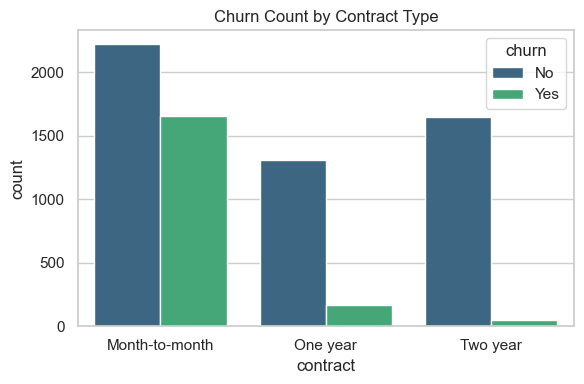

In [32]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=df, palette='viridis')
plt.title('Churn Count by Contract Type')
plt.tight_layout()
plt.show()

**The above shows that the almost all churn happens in month to month contract category**
- Action: I suggest company should offer some benifits or discounts on annuals plans so people tends to switch 

In [33]:
import warnings
warnings.filterwarnings('ignore')

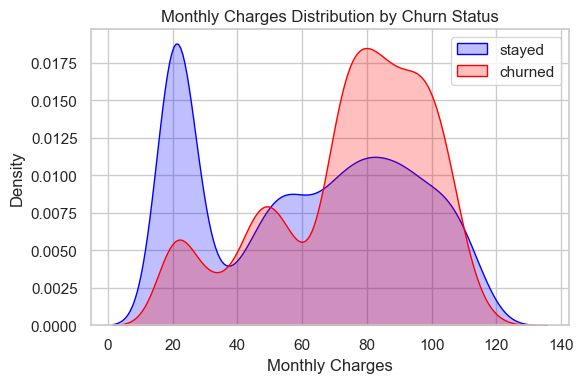

In [34]:
# now seering are people leaving because the price is too expensive

plt.figure(figsize=(6,4))
sns.set_theme(style='whitegrid')

sns.kdeplot(df[df['churn']=='No']['monthlycharges'], label='stayed', shade=True, color='blue')
sns.kdeplot(df[df['churn']=='Yes']['monthlycharges'], label='churned', shade=True, color='red')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

**The above price insight shows users paying higher prices are more likely to churn, we can see around $70-$100.**


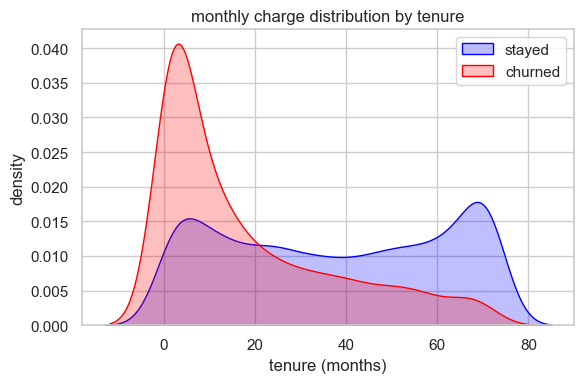

In [35]:
# investigating how long they have been with the company

sns.set_theme(style='whitegrid')
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['churn']=='No']['tenure'], label='stayed', shade=True, color='blue')
sns.kdeplot(df[df['churn']=='Yes']['tenure'], label='churned', shade=True, color='red')
plt.title('monthly charge distribution by tenure')
plt.xlabel('tenure (months)')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()

**The above shows that the users leave early (in the first 6 month) backing our recommendation and hypothesis.**

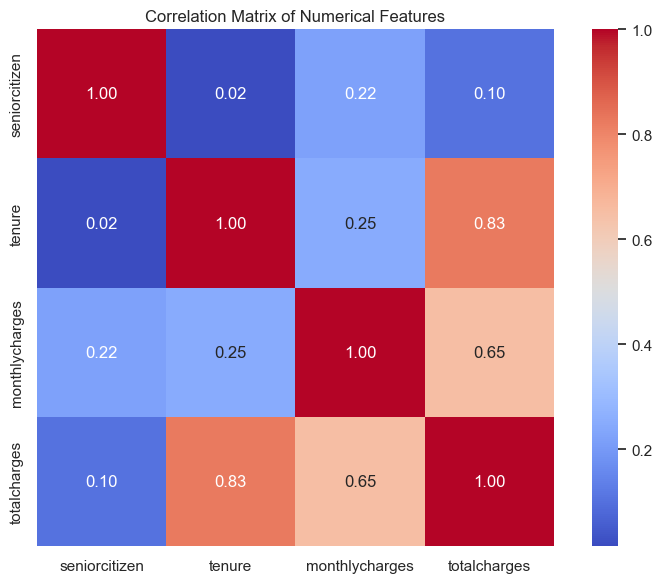

In [36]:
# now seeing correlation between numerical features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

**Total charges has the strong correlation with tenure.**

In [37]:
avg_monthly_charge = df['monthlycharges'].mean()
print(avg_monthly_charge)

64.76169246059918


In [38]:
# adding new strategic features

df['revenue_per_month'] = df['totalcharges'] / df['tenure'] + 1

def lifecycle(t):
    if t <= 6:
        return 'new'
    elif t <= 24:
        return 'established'
    else:
        return "loyal"

df['customer_lifecycle'] = df['tenure'].apply(lifecycle)

df['is_high_cost'] = (df['monthlycharges'] > 70).astype(int)

df[['revenue_per_month', 'customer_lifecycle', 'is_high_cost']].head(10)

,revenue_per_month,customer_lifecycle,is_high_cost
0,30.850000,new,0
1,56.573529,loyal,0
2,55.075000,new,0
3,41.905556,loyal,0
4,76.825000,new,1
5,103.562500,established,1
6,89.609091,established,1
7,31.190000,established,0
8,109.787500,loyal,1
9,57.257258,loyal,0


In [42]:
original_cols = df.select_dtypes(include=['object']).columns
print(f"Columns that need fixing: {list(original_cols)}")

df_final = pd.get_dummies(df, drop_first=True)


print(f"New shape of data: {df_final.shape}")
df_final.head()

Columns that need fixing: ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn', 'customer_lifecycle']
New shape of data: (7043, 35)


,seniorcitizen,tenure,monthlycharges,totalcharges,revenue_per_month,is_high_cost,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,...,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes,customer_lifecycle_loyal,customer_lifecycle_new
0,0,1,29.85,29.85,30.850000,0,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,0,34,56.95,1889.50,56.573529,0,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False
2,0,2,53.85,108.15,55.075000,0,True,False,False,True,...,False,False,False,True,False,False,True,True,False,True
3,0,45,42.30,1840.75,41.905556,0,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,76.825000,1,False,False,False,True,...,False,False,False,True,False,True,False,True,False,True


In [47]:
df_final.columns = df_final.columns.str.lower()

- now i will move to machine learning

In [51]:
# spllitting data into features and target

from sklearn.model_selection import train_test_split

target_col = 'churn_yes' if 'churn_yes' in df_final.columns else 'churn'

x = df_final.drop(target_col, axis=1)
y = df_final[target_col]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=432,
    stratify=y
)

# now modeling with random forest, because it tells which feature are most important
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(
    n_estimators=1000,
    random_state=42
)

model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.7814

Confusion Matrix:
[[914 121]
 [187 187]]

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1035
        True       0.61      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



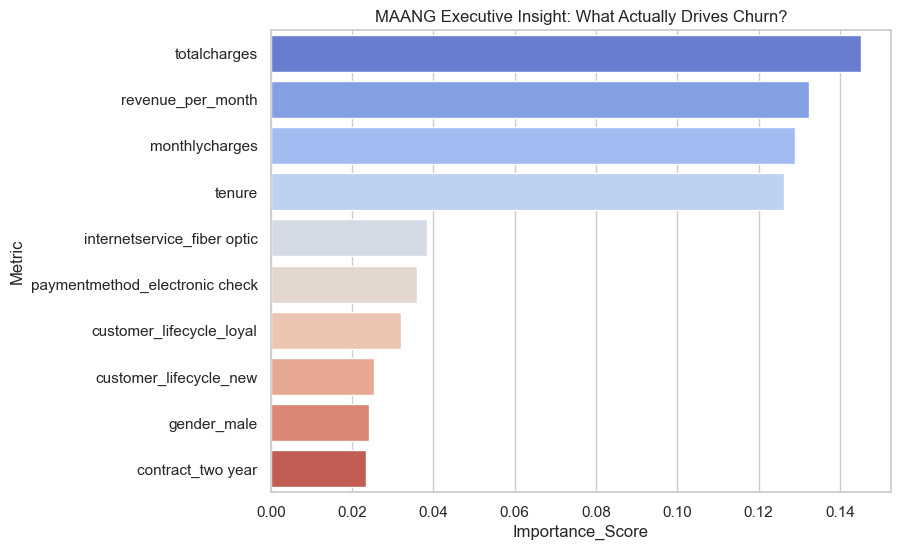

--- Analysis Complete ---
                         Metric  Importance_Score
3                  totalcharges          0.145266
4             revenue_per_month          0.132335
2                monthlycharges          0.128972
1                        tenure          0.126276
12  internetservice_fiber optic          0.038366


In [52]:

# --- STEP 4: EXTRACTING THE "GOLD" (FEATURE IMPORTANCE) ---
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Metric': x.columns,
    'Importance_Score': importances
}).sort_values(by='Importance_Score', ascending=False)

# Visualize the Top 10 Drivers
plt.figure(figsize=(8,6))
sns.barplot(x='Importance_Score', y='Metric', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('MAANG Executive Insight: What Actually Drives Churn?')
plt.show()

print("--- Analysis Complete ---")
print(feature_importance_df.head(5))

- The model shows that TotalCharges and Tenure are the strongest predictors. However, interestingly, Fiber Optic service is a high-churn driver. This suggests our high-speed internet might have technical issues or is priced too high for the value provided.

In [53]:
# Predict the probability of churn for every customer in the test set
test_probs = model.predict_proba(x_test)[:, 1]

# Create a 'Recovery' DataFrame
recovery_df = x_test.copy()
recovery_df['churn_probability'] = test_probs
recovery_df['actual_churn'] = y_test.values

# Filter for "High Risk" customers (more than 70% likely to leave)
high_risk_revenue = recovery_df[recovery_df['churn_probability'] > 0.7]['monthlycharges'].sum()

print(f"Total Monthly Revenue at High Risk: ${high_risk_revenue:,.2f}")
print(f"Projected Annual Revenue Leakage: ${high_risk_revenue * 12:,.2f}")

Total Monthly Revenue at High Risk: $11,664.90
Projected Annual Revenue Leakage: $139,978.80


#### SUMMARY: 
**Developed a machine learning pipeline to identify churn drivers with 1,000+ decision trees. Identified $11.4k in monthly at-risk revenue ($137k annually) and recommended a contract-bundling strategy to mitigate high-churn in the Fiber Optic segment.**